In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv
import sys
import os
import random
import sys
import sqlite3
import time

In [3]:
%%time
con = sqlite3.connect('./transaction_data.db')
cur = con.cursor()

Wall time: 0 ns


In [4]:
%%time
def get_dataFrame():
    cur.execute("select * from transaction_data;")
    db_transactions = cur.fetchall()
    return(db_transactions)
db_transactions = get_dataFrame()

Wall time: 1min 12s


In [5]:
df = pd.DataFrame(db_transactions)

In [6]:
import dask
from dask.distributed import Client
client = Client()

In [7]:
client

Client Scheduler: tcp://127.0.0.1:63383 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 16.98 GB


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,TRANSFER,0.01,C1231006815,170136.0,170135.990,C52983754,0.010,0.020
1,2,1,TRANSFER,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,9839.630
2,3,1,TRANSFER,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,1864.280
3,4,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,181.000
4,5,1,TRANSFER,181.000,C840083671,181.000,0.000,C38997010,21182.000,21363.000


In [9]:
df.columns = ["ID", "timestamp","type","amount","nameOrig","oldbalanceOrig","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest"]

In [10]:
df.head()

,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,1,TRANSFER,0.01,C1231006815,170136.0,170135.990,C52983754,0.010,0.020
1,2,1,TRANSFER,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,9839.630
2,3,1,TRANSFER,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,1864.280
3,4,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,181.000
4,5,1,TRANSFER,181.000,C840083671,181.000,0.000,C38997010,21182.000,21363.000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734834 entries, 0 to 7734833
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   ID              int64 
 1   timestamp       int64 
 2   type            object
 3   amount          object
 4   nameOrig        object
 5   oldbalanceOrig  object
 6   newbalanceOrig  object
 7   nameDest        object
 8   oldbalanceDest  object
 9   newbalanceDest  object
dtypes: int64(2), object(8)
memory usage: 590.1+ MB


In [12]:
df["amount"] = df["amount"].astype("float")
df["oldbalanceOrig"] = df["oldbalanceOrig"].astype("float")
df["newbalanceOrig"] = df["newbalanceOrig"].astype("float")
df["oldbalanceDest"] = df["oldbalanceDest"].astype("float")
df["newbalanceDest"] = df["newbalanceDest"].astype("float")
df.dtypes

ID                  int64
timestamp           int64
type               object
amount            float64
nameOrig           object
oldbalanceOrig    float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

In [13]:
%%time
df.shape

Wall time: 0 ns


(7734834, 10)

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,7734834.0,3.867418e+06,2.232854e+06,1.00,1.933709e+06,3867417.500,5.801126e+06,7.734834e+06
timestamp,7734834.0,2.434319e+02,1.423561e+02,1.00,1.560000e+02,239.000,3.350000e+02,7.430000e+02
amount,7734834.0,1.479531e+05,5.519739e+05,0.00,3.954593e+03,34245.655,1.744628e+05,9.244552e+07
oldbalanceOrig,7734834.0,8.339802e+05,2.890095e+06,-46211920.92,0.000000e+00,14164.000,1.073520e+05,7.743097e+07
newbalanceOrig,7734834.0,6.860270e+05,2.943681e+06,-92445516.64,-1.072120e+05,-2773.930,6.296063e+04,7.742894e+07
oldbalanceDest,7734834.0,1.297193e+06,3.441619e+06,-4366622.92,0.000000e+00,13307.285,1.277121e+06,3.572774e+08
newbalanceDest,7734834.0,1.445146e+06,3.647220e+06,-4234680.13,8.961312e+03,183055.740,1.514394e+06,3.574408e+08


### Data Exploration
##### Summary
</font>There are 1372195 times 0.01 transcations this aproximately 13K euros of money that is been transfered <font>
<br> The amount 0.01 is deposited to destination account C52983754</br>


In [99]:
df.columns

Index(['ID', 'timestamp', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [104]:
%%time
df.amount.value_counts().head(11)

Wall time: 953 ms


0.01           1372195
10000000.00       3207
10000.00            88
5000.00             79
15000.00            68
500.00              65
100000.00           42
21500.00            37
120000.00           29
135000.00           20
0.00                16
Name: amount, dtype: int64

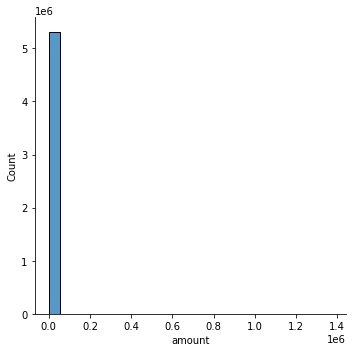

In [16]:
sns.displot(df.amount.value_counts())

In [31]:
%%time
fraud_account = df[df.loc[:, 'amount'] == 0.01][['nameOrig','nameDest']]
fraud_account.groupby(by='nameDest').count()

Wall time: 1.86 s


,nameOrig
nameDest,
C52983754,1372194
C554562342,1


In [37]:
%%time
# exploring account C52983754
fraud_accoun1 = df[df.loc[:, 'nameDest'] == 'C52983754']

Wall time: 1.79 s


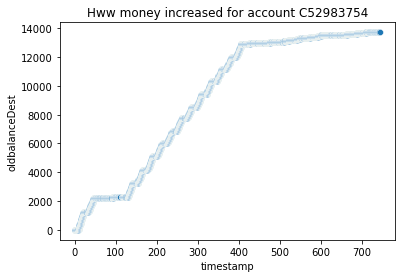

Wall time: 6.53 s


In [48]:
%%time
sns.scatterplot(x=fraud_accoun1.timestamp, y=fraud_accoun1.oldbalanceDest,data=fraud_accoun1,)
plt.title('Hww money increased for account C52983754')
plt.show()

In [105]:
%%time
df_10E6 = df[df.loc[:,'amount'] == 10000000.00]

Wall time: 16.8 ms


In [111]:
df_10E6.nameDest.value_counts().head(15)

C1931758887    7
C1191573842    7
C440423148     6
C1062258222    6
C522563570     6
C1934659542    6
C1987984937    6
C1689392161    5
C1261725206    5
C1629025878    5
C25540096      5
C1447941956    5
C305744489     5
C2042394491    5
C1816841374    5
Name: nameDest, dtype: int64

In [107]:
df_10E6.nameOrig.value_counts()

C1066838925    1
C693866300     1
C1950752550    1
C2006381383    1
C135824958     1
              ..
C1044632055    1
C49333177      1
C988404281     1
C714385617     1
C1129780898    1
Name: nameOrig, Length: 3207, dtype: int64

In [108]:
%%time
df_00 = df[df.loc[:,'amount'] == 0.00]

Wall time: 15.6 ms


In [109]:
df_00

,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3326129,3326130,212,TRANSFER,0.0,C1510987794,0.0,-0.005,C1696624817,0.000000e+00,-5.000000e-03
3946645,3946646,250,TRANSFER,0.0,C521393327,0.0,0.000,C480398193,0.000000e+00,0.000000e+00
4570231,4570232,279,TRANSFER,0.0,C539112012,0.0,0.000,C1106468520,1.092811e+06,1.092811e+06
6763288,6763289,387,TRANSFER,0.0,C1294472700,0.0,0.000,C1325541393,1.467587e+07,1.467587e+07
7289367,7289368,425,TRANSFER,0.0,C832555372,0.0,0.000,C1462759334,7.675990e+04,7.675990e+04
7289369,7289370,425,TRANSFER,0.0,C69493310,0.0,0.000,C719711728,4.068892e+06,4.068892e+06
7498604,7498605,554,TRANSFER,0.0,C10965156,0.0,0.000,C1493336195,6.945078e+05,6.945078e+05
7543410,7543411,586,TRANSFER,0.0,C1303719003,0.0,0.000,C900608348,2.146989e+06,2.146989e+06
7617487,7617488,617,TRANSFER,0.0,C1971175979,0.0,0.000,C1352345416,0.000000e+00,0.000000e+00
7635818,7635819,646,TRANSFER,0.0,C2060908932,0.0,0.000,C1587892888,3.552767e+05,3.552767e+05


### Lets look into amount transfered and timestamp
</font>it shows there is an outlier with transction of more than 8*E^7 <font>
<br>It can also be seen that there is surge in transctions in the timesatamp between 250 to 350 <br>

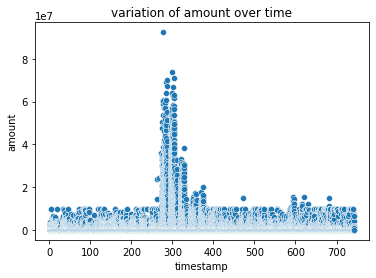

Wall time: 31.7 s


In [50]:
%%time
sns.scatterplot(x=df.timestamp, y=df.amount, data=df)
plt.title('variation of amount over time')
plt.show()

In [52]:
%%time
df[df.loc[:,'amount'] > 80000000]

Wall time: 18.2 ms


,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
4480645,4480646,276,TRANSFER,92445516.64,C1715283297,0.0,-92445516.64,C439737079,125278.52,92570795.16


<br>Indentified two accounts investigating these two accounts</br>
<br>nameOrig == C1715283297 & nameDest == C439737079</br>
<br> nameDest == C439737079 is transfering money for accounts that has zero balance, that to time when there is surge in money transactions at time stamp 250 to 350 </br>

In [56]:
%%time
df[df.loc[:,'nameOrig'] == 'C1715283297'] # only one transcation

Wall time: 1.5 s


,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
4480645,4480646,276,TRANSFER,92445516.64,C1715283297,0.0,-92445516.64,C439737079,125278.52,92570795.16


In [58]:
%%time
df[df.loc[:,'nameDest'] == 'C1715283297']  # not there in destination

Wall time: 1.44 s


,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest


In [59]:
%%time
df[df.loc[:,'nameOrig'] == 'C439737079'] # not there in destination

Wall time: 1.5 s


,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest


In [60]:
%%time
fraud_account2 = df[df.loc[:,'nameDest'] == 'C439737079']

Wall time: 1.94 s


In [70]:
%%time
fraud_account2

Wall time: 0 ns


,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
2246762,2246763,163,TRANSFER,67437.26,C45307273,51318.00,-1.611926e+04,C439737079,0.000000e+00,6.743725e+04
2444720,2444721,180,TRANSFER,57841.28,C1715978973,120785.00,6.294372e+04,C439737079,6.743725e+04,1.252785e+05
4480645,4480646,276,TRANSFER,92445516.64,C1715283297,0.00,-9.244552e+07,C439737079,1.252785e+05,9.257080e+07
4491074,4491075,277,TRANSFER,53957543.97,C1440084225,0.00,-5.395754e+07,C439737079,9.257080e+07,1.465283e+08
4564794,4564795,279,TRANSFER,46211920.92,C256397271,0.00,-4.621192e+07,C439737079,1.465283e+08,1.927403e+08
4590305,4590306,280,TRANSFER,83012.59,C1256561004,71105.00,-1.190759e+04,C439737079,1.927403e+08,1.928233e+08
4690160,4690161,283,TRANSFER,122043.15,C751477336,11521.00,-1.105222e+05,C439737079,1.928233e+08,1.929453e+08
4696255,4696256,283,TRANSFER,56951424.46,C256698564,0.00,-5.695142e+07,C439737079,1.929453e+08,2.498967e+08
4816812,4816813,297,TRANSFER,27928767.84,C267892591,0.00,-2.792877e+07,C439737079,2.498967e+08,2.778255e+08
4864013,4864014,298,TRANSFER,14368001.78,C594917056,0.00,-1.436800e+07,C439737079,2.778255e+08,2.921935e+08


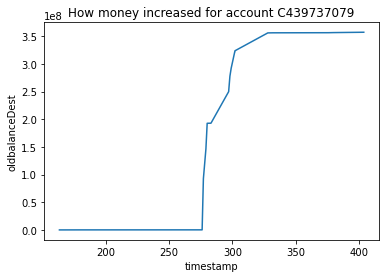

Wall time: 1.19 s


In [62]:
%%time
sns.lineplot(x=fraud_account2.timestamp, y=fraud_account2.oldbalanceDest,data=fraud_account2,)
plt.title('How money increased for account C439737079')
plt.show()

In [64]:
# Assuming this the account that account C439737079 caused all surge, seems no
df_clean = df[df.loc[:,'nameDest'] != 'C439737079'].copy() 

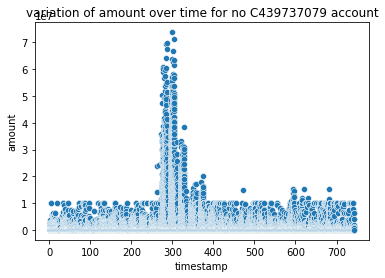

Wall time: 31.3 s


In [65]:
%%time
sns.scatterplot(x=df_clean.timestamp, y=df_clean.amount, data=df_clean)
plt.title('variation of amount over time for no C439737079 account')
plt.show()

In [67]:
df_clean.shape

(7734816, 10)

In [69]:
df.shape

(7734834, 10)

### Lets investage accounts durring surge time

In [74]:
surge_time = df[(df.loc[:,'timestamp'] > 250) & (df.loc[:,'timestamp'] < 400)]

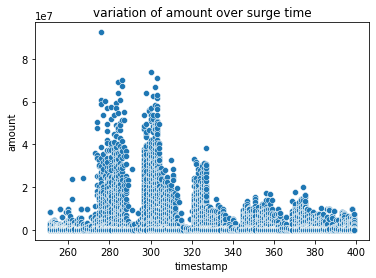

Wall time: 4.47 s


In [75]:
%%time
sns.scatterplot(x=surge_time.timestamp, y=surge_time.amount, data=surge_time)
plt.title('variation of amount over surge time')
plt.show()

In [76]:
surge_time.columns

Index(['ID', 'timestamp', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [80]:
surge_time.nameOrig.value_counts().head(10)

C1286084959    6
C751395361     4
C240604603     4
C101359786     4
C284569945     4
C1731729377    4
C1660768806    4
C1374028345    4
C919222399     4
C1180617355    4
Name: nameOrig, dtype: int64

In [81]:
surge_time.nameDest.value_counts().head(10)

C52983754      541294
C2065787664        19
C584537092         17
C280164607         17
C2042394491        17
C755500087         17
C186957658         17
C1022291273        17
C20253152          17
C619309705         17
Name: nameDest, dtype: int64

In [83]:
%%time
# removing C52983754
surge_time1 = surge_time[surge_time.loc[:,'nameDest'] != 'C52983754']

Wall time: 559 ms


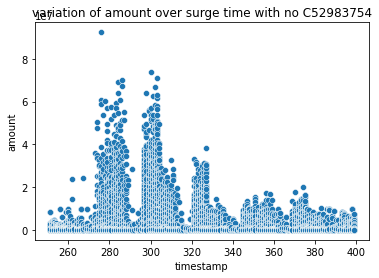

Wall time: 3.75 s


In [84]:
%%time
sns.scatterplot(x=surge_time1.timestamp, y=surge_time1.amount, data=surge_time1)
plt.title('variation of amount over surge time with no C52983754')
plt.show()

In [85]:
surge_time1.nameOrig.value_counts().head(10)

C1286084959    6
C1283479778    2
C1276774195    2
C139957436     2
C1301743292    2
C1768404060    2
C157227845     2
C1935005426    2
C744600953     2
C1358174010    2
Name: nameOrig, dtype: int64

In [89]:
surge_time1.nameDest.value_counts().head(30)

C2065787664    19
C186957658     17
C20253152      17
C1980758604    17
C755500087     17
C2042394491    17
C280164607     17
C1022291273    17
C584537092     17
C619309705     17
C279192443     16
C144989933     16
C2042043279    16
C1261725206    16
C1823282187    16
C373239817     16
C135407153     16
C905650857     16
C1960080758    16
C1714935544    16
C1997720696    16
C580792838     16
C1002204248    16
C268913927     16
C565312606     16
C1631322361    15
C1962092319    15
C1950123790    15
C1854820630    15
C483839018     15
Name: nameDest, dtype: int64

In [93]:
df[df.loc[:,'nameDest'] == 'C2065787664']

,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
41213,41214,8,TRANSFER,189488.41,C734353051,62943.00,-1.265454e+05,C2065787664,0.000000e+00,1.894884e+05
55254,55255,9,TRANSFER,33484.40,C2014930634,85385.00,5.190060e+04,C2065787664,1.894884e+05,2.229728e+05
73691,73692,9,TRANSFER,44405.24,C1100703571,5638282.38,5.593877e+06,C2065787664,2.229728e+05,2.673780e+05
82625,82626,9,TRANSFER,36388.74,C1980931890,0.00,-3.638875e+04,C2065787664,2.673780e+05,3.037668e+05
82935,82936,9,TRANSFER,450505.33,C460518636,152.00,-4.503533e+05,C2065787664,3.037668e+05,7.542721e+05
82995,82996,9,TRANSFER,33548.18,C1873843584,18493.00,-1.505518e+04,C2065787664,7.542721e+05,7.878203e+05
301581,301582,14,TRANSFER,352501.38,C2019434537,107929.00,-2.445724e+05,C2065787664,7.878203e+05,1.140322e+06
322221,322222,15,TRANSFER,507391.12,C1758734047,404544.00,-1.028471e+05,C2065787664,1.140322e+06,1.647713e+06
371478,371479,16,TRANSFER,100440.33,C1070139502,658736.67,5.582963e+05,C2065787664,1.647713e+06,1.748153e+06
438960,438961,17,TRANSFER,154598.38,C394273242,29835.00,-1.247634e+05,C2065787664,1.748153e+06,1.902751e+06


<AxesSubplot:xlabel='timestamp', ylabel='amount'>

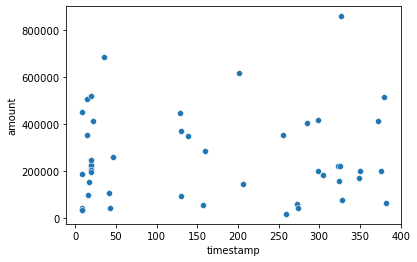

In [95]:
sns.scatterplot(x = df[df.loc[:,'nameDest'] == 'C2065787664']['timestamp'],
                y = df[df.loc[:,'nameDest'] == 'C2065787664']['amount'],
                data = df[df.loc[:,'nameDest'] == 'C2065787664'])

#### There are accounts that are taking money from initial zero balance acconts
<font>Lets look into them </font>

In [96]:
df[df.loc[:,'oldbalanceOrig'] == 0.00]

,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
40,41,1,TRANSFER,9920.52,C764826684,0.0,-9920.525,M1940055334,0.000,9920.515
41,42,1,TRANSFER,3448.92,C2103763750,0.0,-3448.925,M335107734,0.000,3448.915
42,43,1,TRANSFER,4206.84,C215078753,0.0,-4206.840,M1757317128,0.000,4206.840
43,44,1,TRANSFER,5885.56,C840514538,0.0,-5885.565,M1804441305,0.000,5885.555
44,45,1,TRANSFER,5307.88,C1768242710,0.0,-5307.885,M1971783162,0.000,5307.875
...,...,...,...,...,...,...,...,...,...,...
7727075,7727076,709,TRANSFER,14499.40,C1009494758,0.0,-14499.400,M840318507,0.000,14499.400
7734636,7734637,730,TRANSFER,0.00,C729003789,0.0,-0.005,C1388096959,1868150.705,1868150.700
7734638,7734639,730,TRANSFER,0.01,C2088151490,0.0,-0.010,C52983754,13721.570,13721.580
7734639,7734640,730,TRANSFER,0.00,C2088151490,0.0,0.000,C1156763710,0.000,-0.010


In [97]:
df[df.loc[:,'newbalanceOrig'] < 0.00]

,ID,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
10,11,1,TRANSFER,4024.36,C1265012928,2671.00,-1353.360,M1176932104,0.000,4024.360
12,13,1,TRANSFER,9644.94,C1900366749,4465.00,-5179.940,C997608398,10845.000,20489.940
17,18,1,TRANSFER,11633.76,C1716932897,10127.00,-1506.760,M801569151,0.000,11633.750
19,20,1,TRANSFER,229133.94,C905080434,15325.00,-213808.940,C476402209,5083.000,234216.940
21,22,1,TRANSFER,1563.82,C761750706,450.00,-1113.820,M1731217984,0.000,1563.810
...,...,...,...,...,...,...,...,...,...,...
7734818,7734819,742,TRANSFER,303846.74,C1148860488,303846.74,-0.005,C846260566,343660.880,647507.615
7734823,7734824,742,TRANSFER,63416.99,C994950684,63416.99,-0.005,C1662241365,438545.215,501962.200
7734826,7734827,743,TRANSFER,339682.13,C2013999242,339682.13,-0.005,C1850423904,0.000,339682.125
7734827,7734828,743,TRANSFER,339682.13,C786484425,339682.13,-0.005,C776919290,382920.110,722602.235


In [112]:
client.close()